In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

**base_model--CNN**

In [2]:
# Define your CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

c:\Users\THINKPAD\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**RESNET_50**

In [3]:
# Load the ResNet50 model with pre-trained weights, excluding the top layer
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

x = base_model_resnet50.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

model_resnet50 = Model(inputs=base_model_resnet50.input, outputs=predictions)

for layer in base_model_resnet50.layers:
    layer.trainable = False

**VVG16**

In [4]:
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

x = base_model_vgg16.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
predictions_vgg16 = Dense(3, activation='softmax')(x)

model_vgg16 = Model(inputs=base_model_vgg16.input, outputs=predictions_vgg16)

for layer in base_model_vgg16.layers:
    layer.trainable = False

cnn

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

resnet-50

In [6]:
model_resnet50.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

vvg_16

In [7]:
model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


**Preprocessing**

In [8]:
training_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [9]:
testing_data_generator = ImageDataGenerator(
    rescale=1.0/255
)

In [10]:
training_dataset = training_data_generator.flow_from_directory(
    'Covid-19/train',
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical'
)

Found 251 images belonging to 3 classes.


In [11]:
testing_dataset = testing_data_generator.flow_from_directory(
    'Covid-19/test',
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical'
)

Found 66 images belonging to 3 classes.


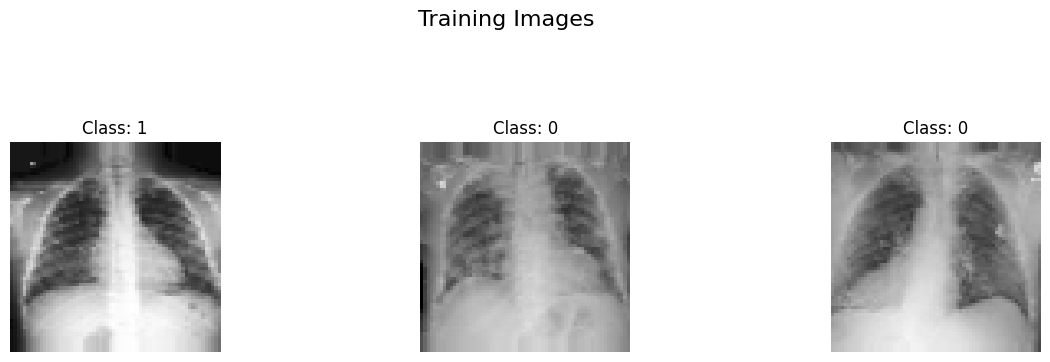

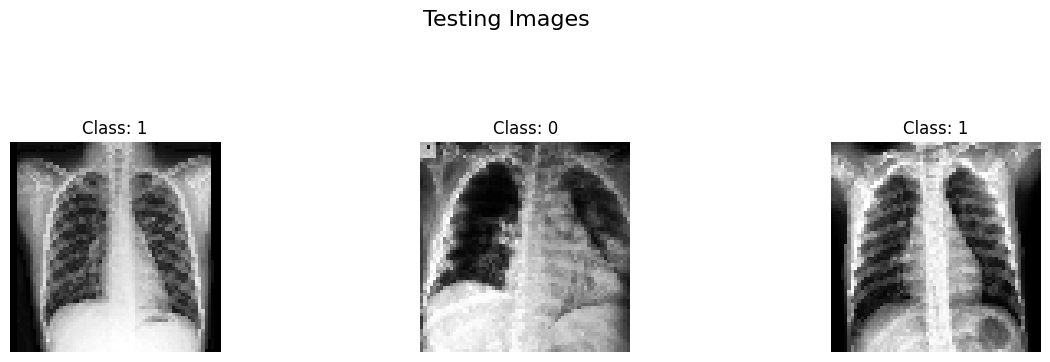

In [12]:
def display_images(dataset_generator, num_images, dataset_type):
    # Get a batch of images from the generator
    images, labels = next(dataset_generator)

    # Plot the images
    plt.figure(figsize=(15, 6))
    plt.suptitle(f"{dataset_type} Images", fontsize=16, y=1.1)
    for i in range(num_images):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"Class: {labels[i].argmax()}")  # Assuming one-hot encoding for labels
        plt.axis("off")
    plt.show()

# Display training images
display_images(training_dataset, 3, 'Training')

# Display testing images
display_images(testing_dataset, 3, 'Testing')


**CNN**

In [13]:
history = model.fit(
    training_dataset,
    epochs=15,
    verbose=1,
    validation_data=testing_dataset
)

Epoch 1/15


c:\Users\THINKPAD\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 446ms/step - accuracy: 0.3360 - loss: 1.1235 - val_accuracy: 0.6970 - val_loss: 1.0207
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 154ms/step - accuracy: 0.6082 - loss: 0.9910 - val_accuracy: 0.6818 - val_loss: 0.7423
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 149ms/step - accuracy: 0.6769 - loss: 0.7384 - val_accuracy: 0.8182 - val_loss: 0.4314
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 0.8005 - loss: 0.4560 - val_accuracy: 0.8485 - val_loss: 0.4068
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 172ms/step - accuracy: 0.7953 - loss: 0.4726 - val_accuracy: 0.8788 - val_loss: 0.3759
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - accuracy: 0.8117 - loss: 0.4459 - val_accuracy: 0.8636 - val_loss: 0.3162
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.9109 - loss: 0.3419 - val_accuracy: 0.8182 - val_loss: 0.3456
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.9134 - loss: 0.2918 - val_accuracy: 0.8636 - val_loss: 0.3368
Ep


**RESNET50**

In [14]:
# Train the resnet50model
history_resnet50 = model_resnet50.fit(
    training_dataset,
    epochs=15,
    verbose=1,
    validation_data=testing_dataset
)

Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 728ms/step - accuracy: 0.4678 - loss: 1.1019 - val_accuracy: 0.5758 - val_loss: 0.8985
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 362ms/step - accuracy: 0.5690 - loss: 0.8607 - val_accuracy: 0.6970 - val_loss: 0.7445
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 361ms/step - accuracy: 0.6549 - loss: 0.8127 - val_accuracy: 0.7121 - val_loss: 0.6340
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 363ms/step - accuracy: 0.7129 - loss: 0.7572 - val_accuracy: 0.7273 - val_loss: 0.5997
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 363ms/step - accuracy: 0.6488 - loss: 0.7584 - val_accuracy: 0.8030 - val_loss: 0.6058
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 372ms/step - accuracy: 0.7159 - loss: 0.6280 - val_accuracy: 0.7727 - val_loss: 0.6249
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 375ms/step - accuracy: 0.7838 - loss: 0.5955 - val_accuracy: 0.8182 - val_loss: 0.5579
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 360ms/step - accuracy: 0.7944 - loss: 0.6032 - val_accuracy: 0.8485 - val_loss

*VVG16* 

In [15]:
# Train the VGG16 model
history_vgg16 = model_vgg16.fit(
    training_dataset,
    epochs=15,
    verbose=1,
    validation_data=testing_dataset
)

Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.5119 - loss: 0.9956 - val_accuracy: 0.8333 - val_loss: 0.4696
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 870ms/step - accuracy: 0.8340 - loss: 0.4572 - val_accuracy: 0.8030 - val_loss: 0.4035
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 890ms/step - accuracy: 0.9066 - loss: 0.2881 - val_accuracy: 0.8636 - val_loss: 0.3266
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 900ms/step - accuracy: 0.9321 - loss: 0.2421 - val_accuracy: 0.8485 - val_loss: 0.3212
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 649ms/step - accuracy: 0.8845 - loss: 0.2929 - val_accuracy: 0.8485 - val_loss: 0.2756
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 521ms/step - accuracy: 0.8852 - loss: 0.2665 - val_accuracy: 0.8788 - val_loss: 0.2541
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 525ms/step - accuracy: 0.9142 - loss: 0.1980 - val_accuracy: 0.8636 - val_loss: 0.2718
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 662ms/step - accuracy: 0.9420 - loss: 0.1703 - val_accuracy: 0.8788 - val_los


**Comaparing Accuracy**

*CNN*

In [16]:
# Evaluate on training set
loss, accuracy_train = model.evaluate(training_dataset, verbose=0)
print(f"Training Accuracy: {accuracy_train}")

# Evaluate on testing set
loss, accuracy_test = model.evaluate(testing_dataset, verbose=0)
print(f"Test Accuracy: {accuracy_test}")

Training Accuracy: 0.9163346886634827
Test Accuracy: 0.8484848737716675


In [17]:
precision_cnn = precision_score(testing_dataset.classes, np.argmax(model.predict(testing_dataset), axis=1), average='weighted')
recall_cnn = recall_score(testing_dataset.classes, np.argmax(model.predict(testing_dataset), axis=1), average='weighted')
f1_cnn = f1_score(testing_dataset.classes, np.argmax(model.predict(testing_dataset), axis=1), average='weighted')

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step


In [18]:
print(f'CNN Precision: {precision_cnn:.2f}')
print(f'CNN Recall: {recall_cnn:.2f}')
print(f'CNN F1-score: {f1_cnn:.2f}')

CNN Precision: 0.40
CNN Recall: 0.29
CNN F1-score: 0.29



*Resnet_50*

In [19]:
# Evaluate the model
loss, accuracy_train = model_resnet50.evaluate(training_dataset, verbose=0)
print(f"ResNet50 Training Accuracy: {accuracy_train}")

loss, accuracy_test = model_resnet50.evaluate(testing_dataset, verbose=0)
print(f"ResNet50 Test Accuracy: {accuracy_test}")

ResNet50 Training Accuracy: 0.7529880404472351
ResNet50 Test Accuracy: 0.8030303120613098


In [20]:
precision_resnet50 = precision_score(testing_dataset.classes, np.argmax(model_resnet50.predict(testing_dataset), axis=1), average='weighted')
recall_resnet50 = recall_score(testing_dataset.classes, np.argmax(model_resnet50.predict(testing_dataset), axis=1), average='weighted')
f1_resnet50 = f1_score(testing_dataset.classes, np.argmax(model_resnet50.predict(testing_dataset), axis=1), average='weighted')

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step  
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step


In [21]:
print(f'ResNet50 Precision: {precision_resnet50:.2f}')
print(f'ResNet50 Recall: {recall_resnet50:.2f}')
print(f'ResNet50 F1-score: {f1_resnet50:.2f}')

ResNet50 Precision: 0.42
ResNet50 Recall: 0.35
ResNet50 F1-score: 0.23


*VGG16*

In [22]:

# Evaluate the VGG16 model
loss, accuracy_train_vgg16 = model_vgg16.evaluate(training_dataset, verbose=0)
print(f"VGG16 Training Accuracy: {accuracy_train_vgg16}")

loss, accuracy_test_vgg16 = model_vgg16.evaluate(testing_dataset, verbose=0)
print(f"VGG16 Test Accuracy: {accuracy_test_vgg16}")


VGG16 Training Accuracy: 0.9681274890899658
VGG16 Test Accuracy: 0.939393937587738


In [23]:
precision_vgg16 = precision_score(testing_dataset.classes, np.argmax(model_vgg16.predict(testing_dataset), axis=1), average='weighted')
recall_vgg16 = recall_score(testing_dataset.classes, np.argmax(model_vgg16.predict(testing_dataset), axis=1), average='weighted')
f1_vgg16 = f1_score(testing_dataset.classes, np.argmax(model_vgg16.predict(testing_dataset), axis=1), average='weighted')


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 436ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 411ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 361ms/step


In [24]:

print(f'VGG16 Precision: {precision_vgg16:.2f}')
print(f'VGG16 Recall: {recall_vgg16:.2f}')
print(f'VGG16 F1-score: {f1_vgg16:.2f}')

VGG16 Precision: 0.34
VGG16 Recall: 0.38
VGG16 F1-score: 0.29


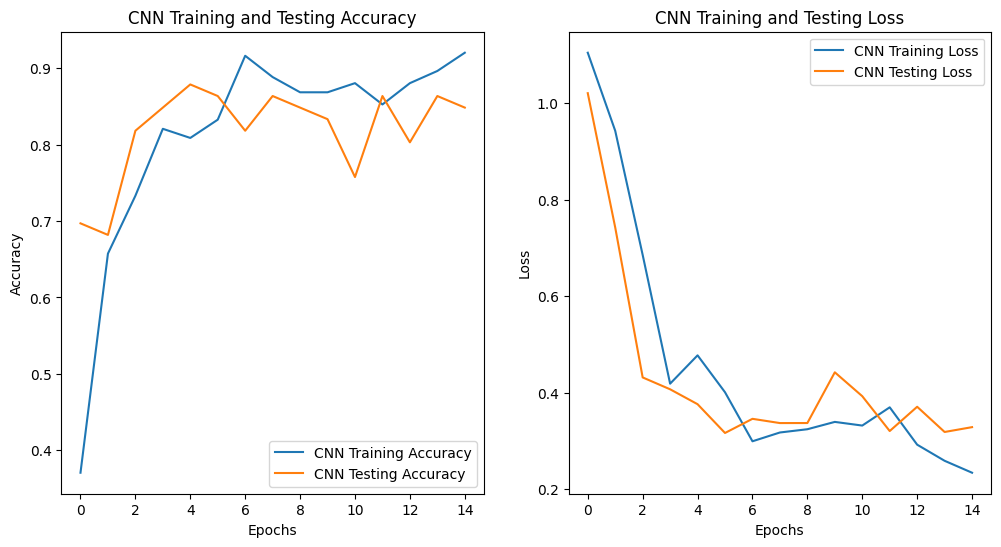

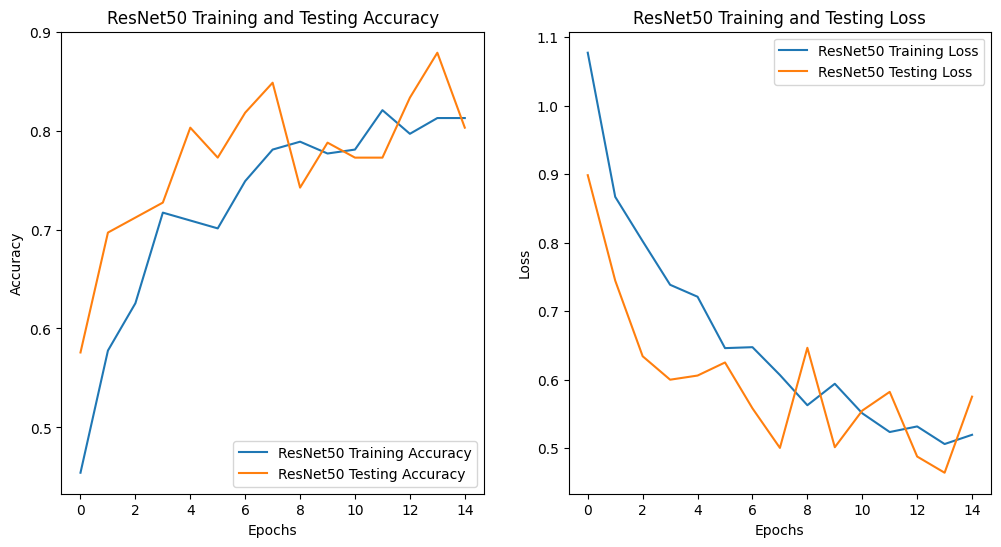

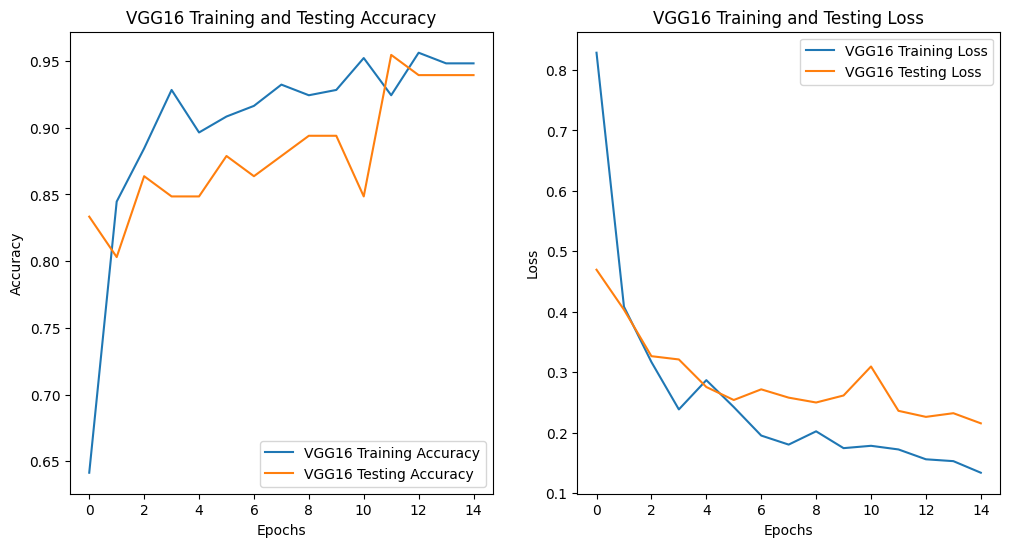

In [25]:
# Plotting CNN
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(history.history['val_accuracy'], label='CNN Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Training and Testing Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='CNN Training Loss')
plt.plot(history.history['val_loss'], label='CNN Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN Training and Testing Loss')
plt.legend()
plt.show()

# Plotting ResNet50
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_resnet50.history['accuracy'], label='ResNet50 Training Accuracy')
plt.plot(history_resnet50.history['val_accuracy'], label='ResNet50 Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('ResNet50 Training and Testing Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_resnet50.history['loss'], label='ResNet50 Training Loss')
plt.plot(history_resnet50.history['val_loss'], label='ResNet50 Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('ResNet50 Training and Testing Loss')
plt.legend()
plt.show()

# Plotting VGG16
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_vgg16.history['accuracy'], label='VGG16 Training Accuracy')
plt.plot(history_vgg16.history['val_accuracy'], label='VGG16 Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('VGG16 Training and Testing Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_vgg16.history['loss'], label='VGG16 Training Loss')
plt.plot(history_vgg16.history['val_loss'], label='VGG16 Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('VGG16 Training and Testing Loss')
plt.legend()
plt.show()

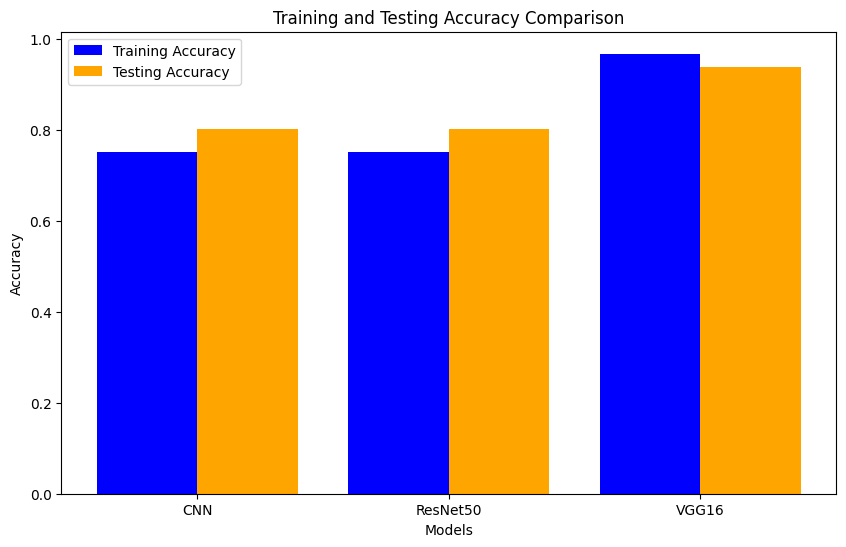

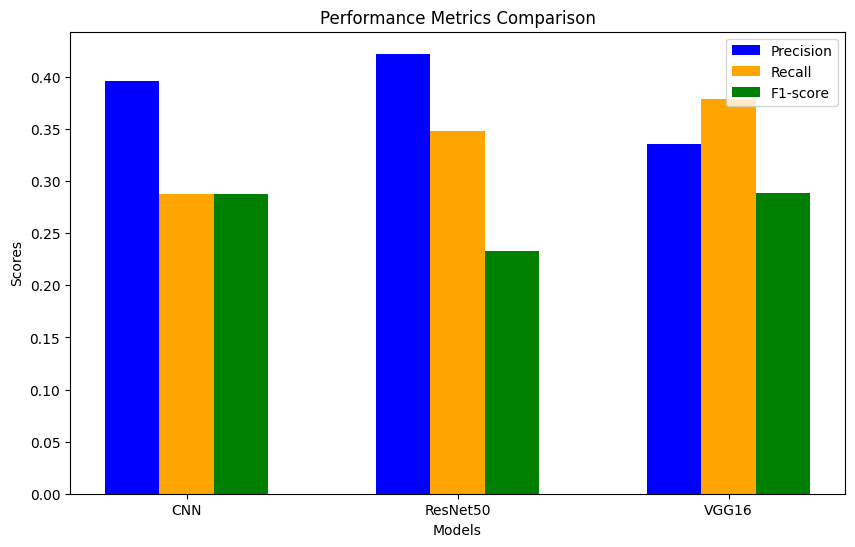

In [26]:
models = ['CNN', 'ResNet50', 'VGG16']
training_accuracies = [accuracy_train, accuracy_train, accuracy_train_vgg16]
testing_accuracies = [accuracy_test, accuracy_test, accuracy_test_vgg16]

# Plot
x = range(len(models))
width = 0.4

plt.figure(figsize=(10, 6))

plt.bar(x, training_accuracies, width, label='Training Accuracy', color='blue')
plt.bar([i + width for i in x], testing_accuracies, width, label='Testing Accuracy', color='orange')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy Comparison')
plt.xticks([i + width/2 for i in x], models)
plt.legend()

plt.show()

models = ['CNN', 'ResNet50', 'VGG16']
precision_scores = [precision_cnn, precision_resnet50, precision_vgg16]
recall_scores = [recall_cnn, recall_resnet50, recall_vgg16]
f1_scores = [f1_cnn, f1_resnet50, f1_vgg16]

# Plot
x = range(len(models))
width = 0.2

plt.figure(figsize=(10, 6))

plt.bar(x, precision_scores, width, label='Precision', color='blue')
plt.bar([i + width for i in x], recall_scores, width, label='Recall', color='orange')
plt.bar([i + 2*width for i in x], f1_scores, width, label='F1-score', color='green')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance Metrics Comparison')
plt.xticks([i + width for i in x], models)
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


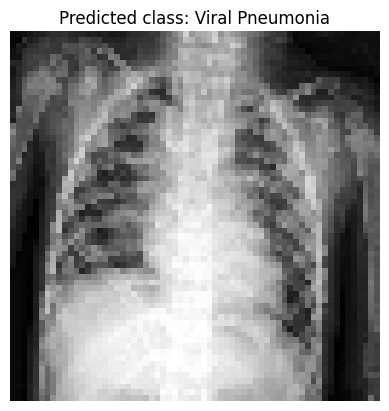

In [27]:
img_path = r'Covid-19\test\Viral Pneumonia\0104.jpeg'
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize the image as per training data

# Predict the class label using the ResNet50 model
prediction_cnn = model.predict(img_array)
predicted_class_cnn = np.argmax(prediction_cnn)
class_labels = ["Covid", "Normal", "Viral Pneumonia"]
predicted_label_resnet50 = class_labels[predicted_class_cnn]

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.title("Predicted class: " + predicted_label_resnet50)  # Add title with predicted label
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


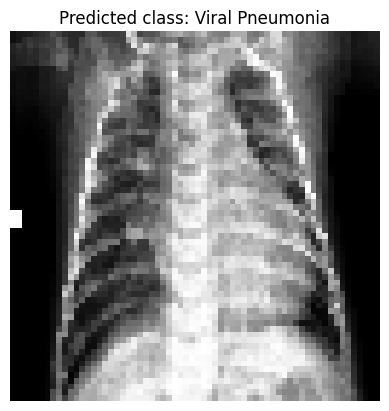

In [28]:
img_path = r'Covid-19\test\Viral Pneumonia\0107.jpeg'
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize the image as per training data

# Predict the class label using the ResNet50 model
prediction_resnet50 = model_resnet50.predict(img_array)
predicted_class_resnet50 = np.argmax(prediction_resnet50)
class_labels = ["Covid", "Normal", "Viral Pneumonia"]
predicted_label_resnet50 = class_labels[predicted_class_resnet50]

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.title("Predicted class: " + predicted_label_resnet50)  # Add title with predicted label
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


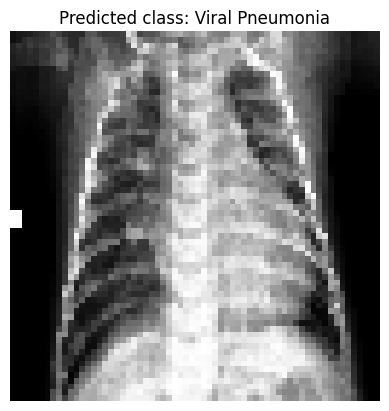

In [29]:
img_path = r'Covid-19\test\Viral Pneumonia\0107.jpeg'
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize the image as per training data

# Predict the class label using the VGG16 model
prediction_vgg16 = model_vgg16.predict(img_array)
predicted_class_vgg16 = np.argmax(prediction_vgg16)
class_labels = ["Covid", "Normal", "Viral Pneumonia"]
predicted_label_vgg16 = class_labels[predicted_class_vgg16]

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.title("Predicted class: " + predicted_label_vgg16)  # Add title with predicted label
plt.show()

In [30]:
model_resnet50.save("model_resnet50.h5")
model_vgg16.save("model_vgg16.h5")
model.save("model_cnn.h5")